1- IMPORT LIBRARIES


In [6]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

2- LOAD DATASET

-> Hotel : 
Hotel (H1 = Resort Hotel or H2 = City Hotel)

-> is_canceled : 
Value indicating if the booking was canceled (1) or not (0)

-> lead_time :
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

-> arrival_date_year :
Year of arrival date

-> arrival_date_month :
Month of arrival date

-> arrival_date_week_number : 
Week number of year for arrival date

-> arrival_date_day_of_month : 
Day of arrival date

-> stays_in_weekend_nights : 
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

-> stays_in_week_nights : 
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

-> adults : 
Number of adults

In [15]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


3- DATA OVERVIEW

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

4- DATA CLEANING & FEATURE ENGINEERING


In [31]:
df = df[df['adr'] > 0]
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['revenue'] = df['adr'] * df['total_nights']
df = df.dropna()

5- KPI CALCULATION

kpi -> key performance indicator

In [32]:
monthly_kpi = df.groupby(['arrival_date_month'])[['adr', 'total_nights', 'revenue']].mean().sort_index()
monthly_kpi['revpar'] = monthly_kpi['adr'] * (monthly_kpi['total_nights'] / df['total_nights'].max())
monthly_kpi

,adr,total_nights,revenue,revpar
arrival_date_month,,,,
April,67.500000,3.000000,202.500000,9.204545
August,118.035714,3.857143,484.535714,20.694573
December,57.072000,2.400000,174.104000,6.226036
February,64.000000,2.500000,143.000000,7.272727
January,63.270000,2.181818,120.382727,6.274711
July,164.030000,3.600000,513.390000,26.841273
June,109.007500,5.000000,501.802500,24.774432
March,58.175000,2.250000,126.550000,5.949716
May,90.222222,1.666667,157.722222,6.835017


6- VISUALIZATION

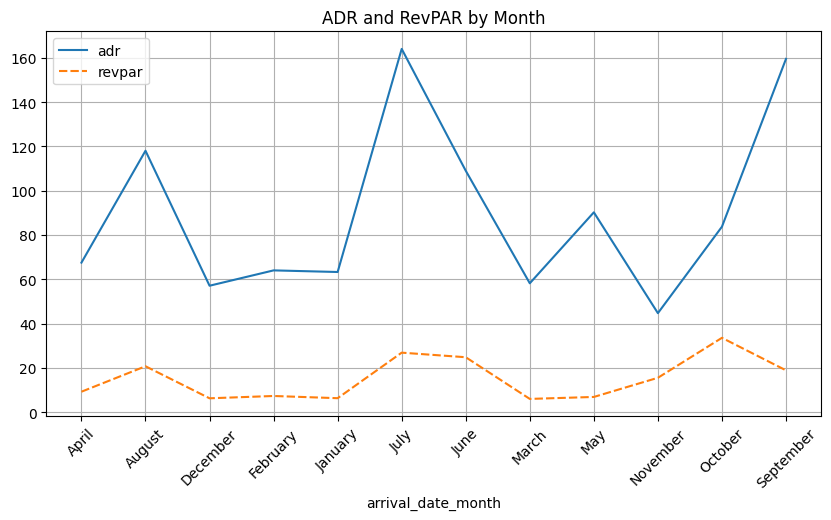

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_kpi[['adr', 'revpar']])
plt.title('ADR and RevPAR by Month')
plt.grid()
plt.xticks(rotation=45)
plt.show()

7- PREDICTIVE MODELING (ADR PREDICTION)

In [ ]:
features = ['lead_time', 'total_nights', 'booking_changes', 'is_repeated_guest']
X = df[features]
y = df['adr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"RMSE: {rmse}")

RMSE: 36.71806191713873


IN ORDER TO KNOW THE ADR( AVERAGE DAILY RATE ) OF A NEW DATA JUST MAKE CHANGES IN THE    ' new_booking ' DATAFRAME

In [42]:
new_booking = pd.DataFrame({
    'lead_time': [87],
    'total_nights': [3],
    'booking_changes': [1],
    'is_repeated_guest': [0]
})
predicted_adr = model.predict(new_booking)
print(f"Predicted ADR: ₹{predicted_adr[0]:.2f}")


Predicted ADR: ₹80.75


FOR BATCH PREDICTION ( just a small example )

In [ ]:
import pandas as pd

batch_data = pd.DataFrame({
    'lead_time': [30, 120, 45],
    'total_nights': [2, 5, 3],
    'booking_changes': [0, 2, 1],
    'is_repeated_guest': [1, 0, 0]
})

predicted_adr_batch = model.predict(batch_data)
batch_data['predicted_adr'] = predicted_adr_batch


In [45]:
print(batch_data)

   lead_time  total_nights  booking_changes  is_repeated_guest  predicted_adr
0         30             2                0                  1      91.404767
1        120             5                2                  0     116.063000
2         45             3                1                  0      50.587081


8- INSIGHTS & CONCLUSION 

-> City hotels have gigher ADR than resort hotels in peak months.

-> Predictive model helps forecast pricing for future bookings.

-> Strategic planning can optimize revenue using these insights.